Import Libraries

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

Load Dataset

In [10]:
# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

Train-Test Split

In [11]:
# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

Scale Features and Target Variable

In [12]:
scaler = MinMaxScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)
y1_train_scaled = scaler.fit_transform(y1_train.values.reshape(-1, 1)).flatten()
y1_test_scaled = scaler.transform(y1_test.values.reshape(-1, 1)).flatten()


Create and Train Neural Network Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x1_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
history = model.fit(x1_train_scaled, y1_train_scaled, epochs=100, validation_split=0.2, verbose=0)


Make Predictions

In [14]:
nn_predictions_scaled = model.predict(x1_test_scaled).flatten()

# Reverse scaling for evaluation metrics
nn_predictions = scaler.inverse_transform(nn_predictions_scaled.reshape(-1, 1)).flatten()


3/3 [==============================] - 0s 2ms/step


Evaluate Model Performance

In [15]:
mape_nn = mean_absolute_percentage_error(y1_test, nn_predictions)
print(f"MAPE for Neural Network: {mape_nn}")

mae_nn = mean_absolute_error(y1_test, nn_predictions)
print(f"MAE for Neural Network: {mae_nn}")


MAPE for Neural Network: 0.01080996461028876
MAE for Neural Network: 40.20976294213599


Scatter Plot

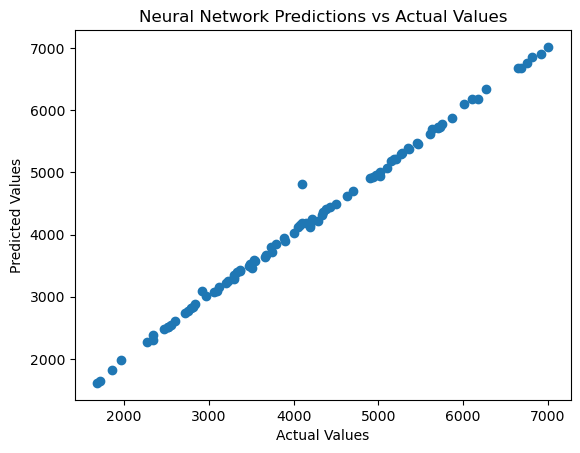

In [16]:
plt.scatter(y1_test, nn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Neural Network Predictions vs Actual Values")
plt.show()
